<a href="https://colab.research.google.com/github/anpendyal/Convolutional-Neural-Networks-in-Breast-Cancer-Identification-Research-10th-Grade-/blob/main/ResNet101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#give program access to google drive where the dataset is
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from keras.applications.resnet import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D
#don't need to import classification models zoo from github because keras already has resnet101

In [ ]:
import tensorflow as tf

#resize images to 224 by 224
IMAGE_SIZE = [224, 224]

#specify paths to dataset in google drive
train_path = "/content/drive/MyDrive/SSI 2021/Train Set"
val_path = "/content/drive/MyDrive/SSI 2021/Validation Set"
test_path = "/content/drive/MyDrive/SSI 2021/Test Set"

In [ ]:
#download ResNet101 and set up model
resnet101 = ResNet101(input_shape = IMAGE_SIZE + [3], weights = "imagenet", include_top = False)

171458560/171446536 [==============================] - 1s 0us/step


In [ ]:
resnet101.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [ ]:
for layer in resnet101.layers:
  layer.trainable = False

In [ ]:
from glob import glob
#training set
folders = glob("/content/drive/MyDrive/SSI 2021/Train Set/*")
len(folders)

2

In [ ]:
from tensorflow.keras import layers
x = layers.Flatten()(resnet101.output)

In [ ]:
prediction = Dense(len(folders), activation = "sigmoid")(x)

#create a model object
model = Model(inputs = resnet101.input, outputs = prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
#binary crossentropy because the model is classifying the image as having cancer or not
#optimizer as adam because it is widely used
#metrics to use in calculation (precision and recall used to calculate f1 score)
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = [
               "accuracy",
                tf.keras.metrics.BinaryAccuracy(),
                tf.keras.metrics.AUC(from_logits=True),
                tf.keras.metrics.Precision(),
                tf.keras.metrics.Recall(),
                tf.keras.metrics.TruePositives(),
                tf.keras.metrics.TrueNegatives(),
                tf.keras.metrics.FalsePositives(),
                tf.keras.metrics.FalseNegatives()
               ]
)

In [ ]:
#use image data generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#image augmentation -- come back to later
#train_datagen = ImageDataGenerator(rescale = 1./255,
#                                   shear_range = 0.2,
#                                   zoom_range = 0.2,
#                                   horizontal_flip = True)

#rescale rgb values from 0-255 to 0-1
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
#same target size as initialized for images
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/SSI 2021/Train Set",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = "categorical")

Found 21607 images belonging to 2 classes.


In [ ]:
validation_set = train_datagen.flow_from_directory("/content/drive/MyDrive/SSI 2021/Validation Set",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = "categorical")

Found 977 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/SSI 2021/Test Set",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = "categorical")

Found 957 images belonging to 2 classes.


In [ ]:
from keras.callbacks import EarlyStopping

#fit the model
#early stopping for epochs

#https://keras.io/api/callbacks/early_stopping/
#https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/ 
#use early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)

history = model.fit(
    training_set,
    validation_data = validation_set,
    epochs = 50,
    #steps_per_epoch = len(training_set),
    #validation_steps = len(validation_set),
    callbacks = [early_stopping]
)

#print number of epochs
len(history.history['loss'])

Epoch 1/50
676/676 [==============================] - 5237s 8s/step - loss: 0.6738 - accuracy: 0.6517 - binary_accuracy: 0.6483 - auc: 0.7047 - precision: 0.6478 - recall: 0.6500 - true_positives: 14045.0000 - true_negatives: 13972.0000 - false_positives: 7635.0000 - false_negatives: 7562.0000 - val_loss: 1.1167 - val_accuracy: 0.5107 - val_binary_accuracy: 0.5102 - val_auc: 0.6797 - val_precision: 0.5102 - val_recall: 0.5097 - val_true_positives: 498.0000 - val_true_negatives: 499.0000 - val_false_positives: 478.0000 - val_false_negatives: 479.0000
Epoch 2/50
676/676 [==============================] - 77s 113ms/step - loss: 0.5955 - accuracy: 0.7083 - binary_accuracy: 0.7086 - auc: 0.7766 - precision: 0.7087 - recall: 0.7085 - true_positives: 15308.0000 - true_negatives: 15314.0000 - false_positives: 6293.0000 - false_negatives: 6299.0000 - val_loss: 0.4733 - val_accuracy: 0.7779 - val_binary_accuracy: 0.7789 - val_auc: 0.8560 - val_precision: 0.7772 - val_recall: 0.7820 - val_true_po

7

Note: Had to stop manually because validation loss kept fluctuating. Early stopping was not able to activate.

In [ ]:
#evalute model with test set
from sklearn.metrics import roc_curve, auc
model.evaluate(test_set, verbose=1)

30/30 [==============================] - 386s 13s/step - loss: 0.5674 - accuracy: 0.7262 - binary_accuracy: 0.7252 - auc: 0.7885 - precision: 0.7257 - recall: 0.7241 - true_positives: 693.0000 - true_negatives: 695.0000 - false_positives: 262.0000 - false_negatives: 264.0000


[0.567449152469635,
 0.7262278199195862,
 0.7251828908920288,
 0.7885465025901794,
 0.7256544232368469,
 0.7241379022598267,
 693.0,
 695.0,
 262.0,
 264.0]

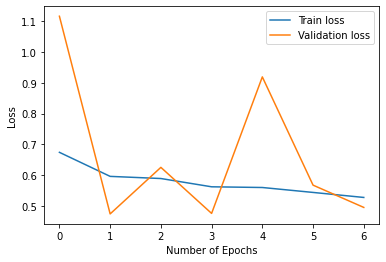

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot loss
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label = "Train loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig("LossVal_loss")

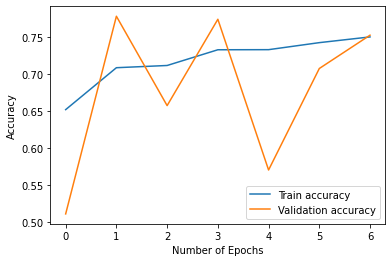

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot accuracy
plt.plot(history.history["accuracy"], label = "Train accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation accuracy")
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig("AccVal_acc")